In [53]:
import numpy as np
import pandas as pd

%matplotlib inline
from scipy import stats
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk

In [54]:
df = pd.read_csv('FlightDelays.csv')

In [55]:
df.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 12 columns):
CRS_DEP_TIME     2201 non-null int64
CARRIER          2201 non-null object
DEP_TIME         2201 non-null int64
DEST             2201 non-null object
DISTANCE         2201 non-null int64
FL_NUM           2201 non-null int64
ORIGIN           2201 non-null object
Weather          2201 non-null int64
DAY_WEEK         2201 non-null int64
DAY_OF_MONTH     2201 non-null int64
TAIL_NUM         2201 non-null object
Flight Status    2201 non-null object
dtypes: int64(7), object(5)
memory usage: 206.4+ KB


In [57]:
df["CARRIER"] = df["CARRIER"].astype('category')
df["DEST"] = df["DEST"].astype('category')
df["ORIGIN"] = df["ORIGIN"].astype('category')
df["TAIL_NUM"] = df["TAIL_NUM"].astype('category')
df["Flight Status"] = df["Flight Status"].astype('category')


df["CARRIER"] = df["CARRIER"].cat.codes
df["DEST"] = df["DEST"].cat.codes
df["ORIGIN"] = df["ORIGIN"].cat.codes
df["TAIL_NUM"] = df["TAIL_NUM"].cat.codes
df["Flight Status"] = df["Flight Status"].cat.codes

In [58]:
df.describe()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,3.355747,1369.298955,1.220354,211.871422,3815.086324,1.245797,0.014539,3.905498,16.024989,296.986824,0.805543
std,432.697149,2.292721,442.462754,0.881148,13.316815,2409.750224,0.563279,0.119725,1.903149,8.677390,137.048161,0.395872
min,600.000000,0.000000,10.000000,0.000000,169.000000,746.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1000.000000,1.000000,1004.000000,0.000000,213.000000,2156.000000,1.000000,0.000000,2.000000,8.000000,201.000000,1.000000
50%,1455.000000,3.000000,1450.000000,2.000000,214.000000,2385.000000,1.000000,0.000000,4.000000,16.000000,308.000000,1.000000
75%,1710.000000,5.000000,1709.000000,2.000000,214.000000,6155.000000,2.000000,0.000000,5.000000,23.000000,424.000000,1.000000
max,2130.000000,7.000000,2330.000000,2.000000,229.000000,7924.000000,2.000000,1.000000,7.000000,31.000000,548.000000,1.000000


In [59]:
Y = df['Flight Status']

In [60]:
X = df.drop('Flight Status',1)


In [61]:
from sklearn import preprocessing

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf3 = LogisticRegression()

In [66]:
clf3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
p3= clf3.predict(X_test)

In [68]:
sk.confusion_matrix(y_test,p3)

array([[ 42,  47],
       [  1, 351]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,p3)*100

89.1156462585034

In [70]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

LR: 0.886839 (0.060341)
KNN: 0.872304 (0.060177)
CART: 0.814198 (0.043734)
NB: 0.817330 (0.069602)
SVM: 0.805512 (0.096759)
RF: 0.795599 (0.075955)
MLP: 0.805512 (0.095901)


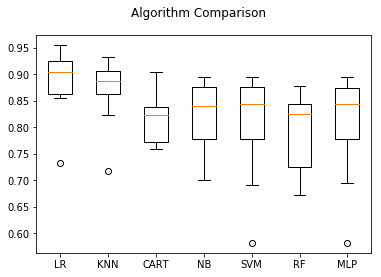

In [71]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10) ))
models.append(('MLP',MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

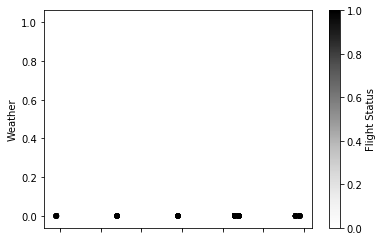

In [73]:
df.plot.scatter(x='DISTANCE', y='Weather', c='Flight Status')
plt.show()

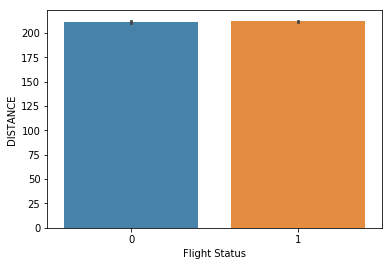

In [74]:
sns.barplot(df['Flight Status'],df['DISTANCE'], alpha=0.9)

In [75]:
df.shape

(2201, 12)

In [76]:
df.to_csv("test.csv")

In [77]:
import csv
import random
import math
import operator
 
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        dataset = dataset[1:]
        for x in range(len(dataset)):
            for y in range(12):         # 0 to 7 , the numeric values only
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
 
 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))     # Sort distances in ascending order
    neighbors = []
    for x in range(k):                             # k nearest neighbors
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

trainingSet=[]
testSet=[]
split = 0.67
loadDataset('test.csv', split, trainingSet, testSet)
print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 1462
Test set: 739
Accuracy: 79.29634641407307%


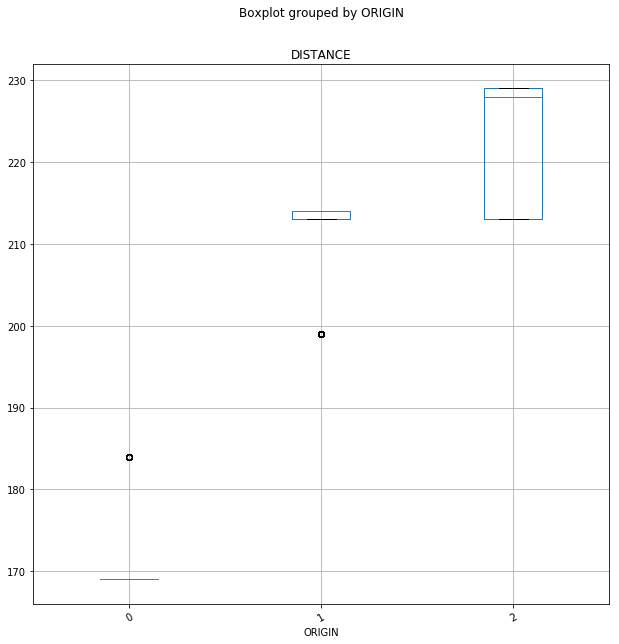

In [80]:
df.boxplot('DISTANCE','ORIGIN',rot = 30,figsize=(10,10))